<h1 align="center">Heart attack prediction and analysis
</h1>

<h2>Project content</h2>


1.[Introduction](#1)
*      1.1 [Examine the project](#2)
*      1.2 [Recognizing the variables in the Dataset](#3)

2.[Project initialization](#4)
*      2.1 [Installing the python libraries](#5)
     *            2.1.1 [Basic libraries](#6)
*      2.2 [Load the dataset](#7)
*      2.3 [Initial dataset analysis](#8)
     *            2.3.1 [Analysis the output](#9)
     
3.[Exploratory Data Analysis (Preparation)](#10)
*      3.1 [Examine the missing values](#11)
*      3.2 [Examine the unique values](#12)
*      3.3 [Seperating the variables (Numerical or Catregorical)](#13)
*      3.4 [Examing the statistics of the variables](#14)

4.[Exploratory Data Analysis](#15)
*      4.1 [Uni-variate data analysis](#16)
      *            4.1.1[Numerical Variables analysis (with Displot)](#17)
      *            4.1.2[Categorical Variable analysis (with Pie Chart)](#18)
                       *  4.1.2.2[Examing the missing values](#19)
                       
5.[Bi-variate Data Analysis](#20)
*      5.1 [Numerical Variable Analysis](#21)
*      5.2 [Examing numeric variables among themselves(Analysis with pair-plot)](#22)
*      5.3 [Feature Scalling with robust method](#23)
*      5.4 [Creating a new dataframe with melt() function](#24)

<h2>1. Introduction <a id=1 ></a>

<h3>1.1. Examine the project <a id=2></a></h3>

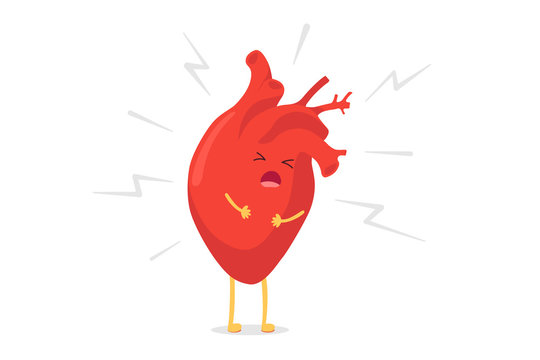

The heart attack prediction system underscores the persistent global health concern posed by cardiovascular diseases, with a particular focus on myocardial infarctions or heart attacks. The importance of early detection is emphasized to facilitate timely intervention and improve patient outcomes. The introduction acknowledges the complexity of risk factors involved in heart attacks, including age, gender, lifestyle, and medical history.

In response to these challenges, the narrative highlights the growing interest in leveraging advanced technology and machine learning for developing predictive systems. The aim is to enhance the accuracy of identifying individuals at risk. The text emphasizes the role of machine learning algorithms in analyzing extensive datasets to uncover patterns and correlations that traditional methods may overlook.

The notebook's overarching goal is introduced as contributing to cardiovascular health by presenting a heart attack prediction system. The system integrates clinical data, lifestyle factors, and advanced machine learning to create a robust and accurate predictive model. Ultimately, the intention is to assist healthcare professionals in proactively identifying individuals at risk of heart attacks, thereby advancing preventive measures and personalized interventions in cardiovascular health care.

<h3>1.2 Recognizing the variables in the data set.<a id=3></a></h3>

1. Age: Age of the patient
1. Sex: Sex of the patient
1. exang: exercise induced angina (1 = yes; 0 = no)
1. ca: number of major vessels (0-3)
1. cp: Chest Pain type chest pain type
     *    Value 1: typical angina
     *    Value 2: atypical angina
     *    Value 3: non-anginal pain
     *    Value 4: asymptomatic

1. trtbps: resting blood pressure (in mm Hg)
1. chol: cholestoral in mg/dl fetched via BMI sensor
1. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
_restecg: resting electrocardiographic results
      *      Value 0: normal
      *      Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      *      Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      
1.  thalach: maximum heart rate achieved
1. target: 0= less chance of heart attack 1= more chance of heart attack

<h2>2. Project initialization<a id=4></a></h2>

<h3> 2.1 Basic libraries<a id=6></a></h3>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<h3>2.2 Load the dataset<a id=7></a></h3>

In [2]:
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<h3>2.3 Initial dataset analysis <a id=8></a></h3>

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Renaming the column names for easy reference

##Introducing the new columns


In [5]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

##Equating the new column names to the previous column names

In [6]:
df.columns=new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Get the shape of the dataset (print the number of rows and number of columns in total)

In [8]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3> 2.3.1 Analysis the output <a id=9></a></h3>

* The data set consist 303 Rows and 14 Columns
* All the variables are in the numerical format (Integer and Float)
* There are no any missing values

<h2>3. Exploratary Data Analysis (Perparation) <a id=10></a></h2>

<h3>3.1 Examine the missing values <a id=11></a></h3>

##Any missing value/data can create a distortion in the visualization.It may affect the accuracy of the decision too. So we have two options. Either Remove the data field from the dataset or get the Median value of thhe similar data in the dataset to fill the missing data.
<i><h5 color='red'>Removing data from the data set considered as the very last choice!!</h3></i>

##Check whether there is any null values (isnull gives two values True if there any null values and False for NOT null values)

In [10]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##we can get the number of null values in each field using sum

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
isnull_number=[]
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index=df.columns, columns=['Total missing values'])

,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


##Visualizing the missing values (we can use missingno library to visualize the missing values) since non of values are empty in our dataset it comes in full.


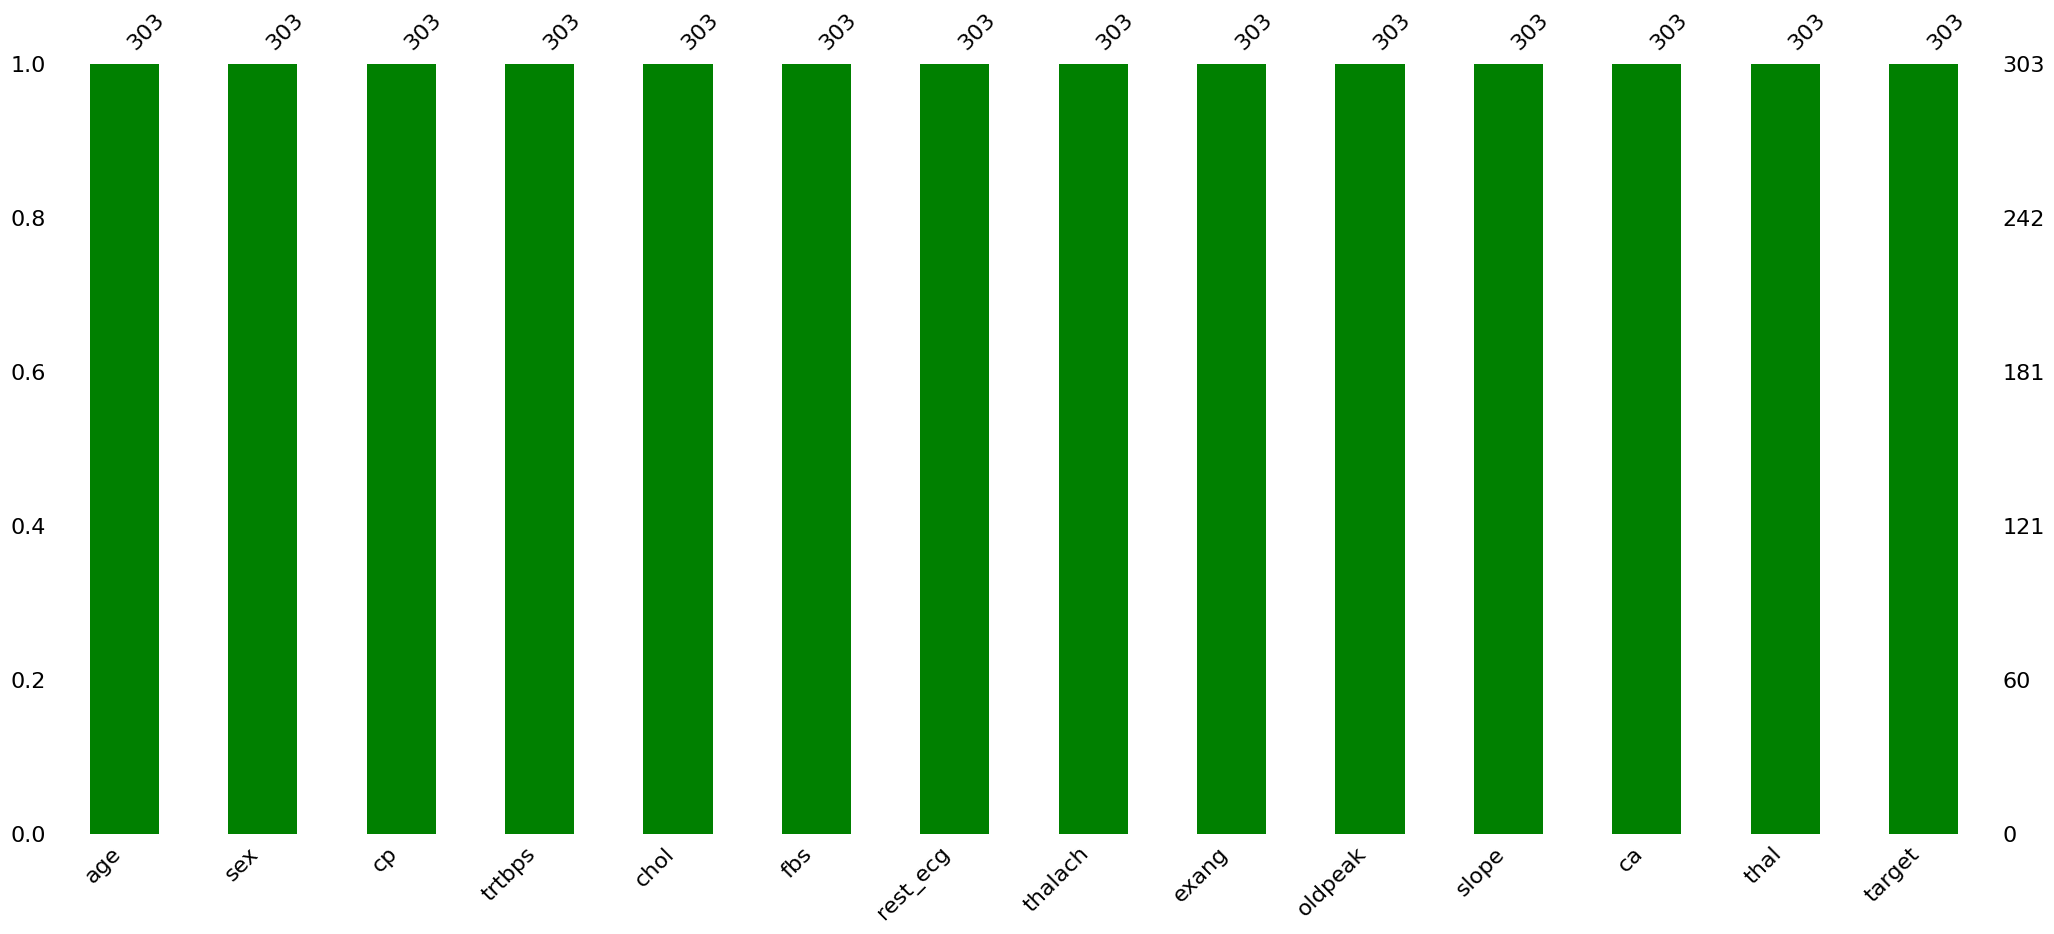

In [13]:
import missingno
missingno.bar(df, color = "g")
plt.show()

<h3>3.2 Examine the unique values <a id='12'></a></h3>

##Observing how many unique values in the dataset (ex:under sex field you have 1 and 0 only so number of unique values for the sex field is two). After analysing unique values we can put our data in a hierarchical structure.

In [14]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##we can see the total count if unique varaibles in the variable. we have 143 of 0 values, 87 of 2 value, 50 of 1 value and 23 of value 3 in our dataset.

In [15]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

##we have four values in our dataset 0,1,2,3

In [16]:
df["cp"].value_counts().sum()

303

In [17]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


* We determined the variables with few unique values 
* ​​as categorical variables, and the variables with high unique values 
* ​​as numeric variables.
* In this context, Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"
* In the next section, we will separate these 2 groups into 2 different lists.

<h3>3.3 Seperating variables (Numerical vs categorical) <a id=13></a></h3>

##Numeric data are basically quantitative data obtained from a variable (ex: persons weight,age,height etc.). Ctegorical data are qualitative data usually is a word or a symbol.(Understand whether a person is a male or a female).

###Seperated numerical and categorical data

In [18]:
numeric_var=["age","trtbps","chol","thalach","oldpeak"]
categoric_var=["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

<h3>3.4 Examine the statistics of the variables <a id=14></a></h3>

Examine the basic statistics of the variables(mean,standard deviation etc.)

In [19]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


##Visualize the variable (ex: visualizing the age variable)

<Axes: xlabel='age', ylabel='Density'>

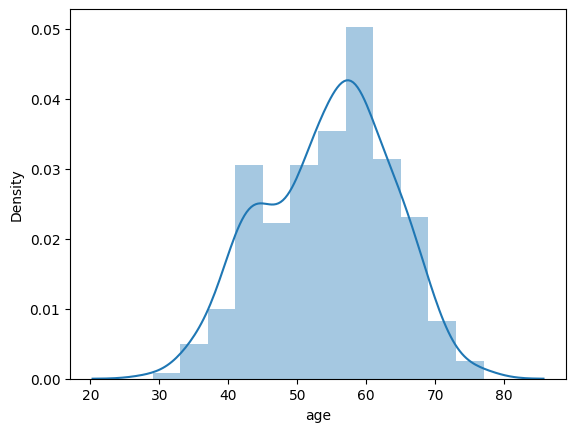

In [20]:
sns.distplot(df["age"])

###Lets add few differenr parameters
1. hist_kws parameter (allows us to edit the graph as a shape)
      * Line width (Represents the bars on the chart)
      * Edge color (Makes the frame color of the bars little bit sharper)

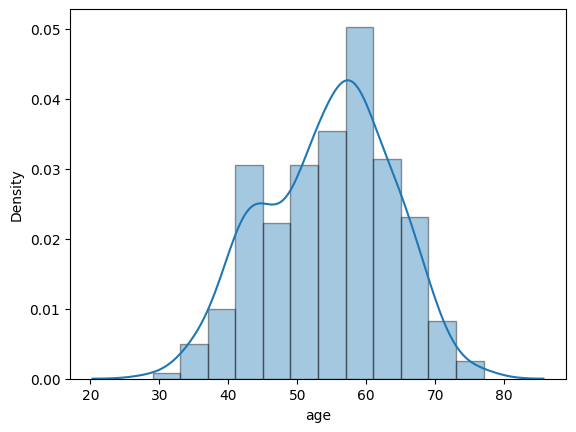

In [21]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

**DEFINE THE STATISTICAL SIDE OF THE DATASET**
   * The data set has a normal distribution.
   * The avg patients in the dataset around 54-55.
   * There is a small skewd towards right side due to the lack of data in left side.
   * So in summary eventhough the data is prone to be in normal distribution there is a slight right skew.

##Lets check it on trtbps (bins=20 is used to display the data using 20 bars)

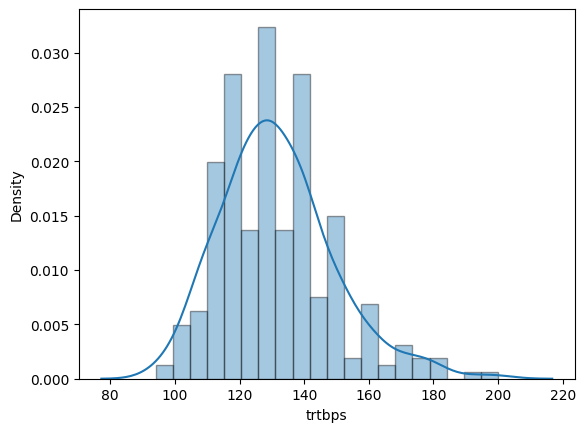

In [22]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"),bins=20);

###The data is very similar to normal distribution bcs the high values on the right and there is a silght right skewed. (MOST ALGORITHMS PRODUCE MORE ACURATE MODALS when the data is in NORMAL DISTRIBUTION)

##Lets visualize the data for the cholestorol level

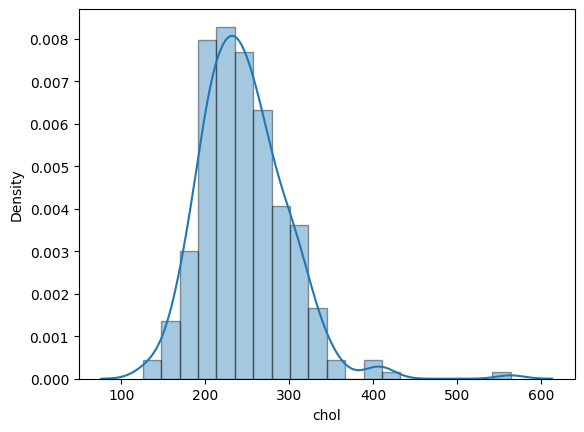

In [23]:
sns.distplot(df["chol"], hist_kws = dict(linewidth = 1, edgecolor = "k"),bins=20);

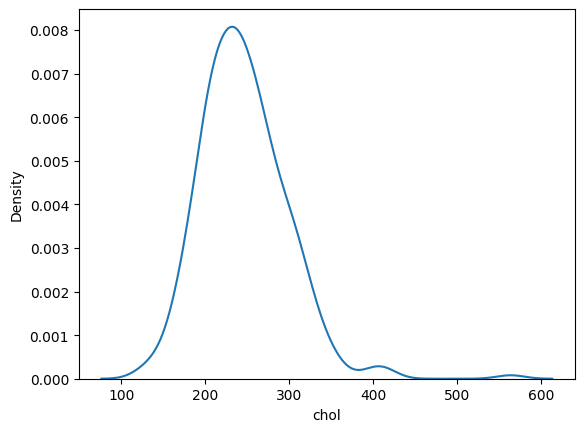

In [24]:
sns.distplot(df["chol"], hist = False);


Here also the data set is tend to be the normal distribution. But there is a slight skew.

##Thalamic variable.

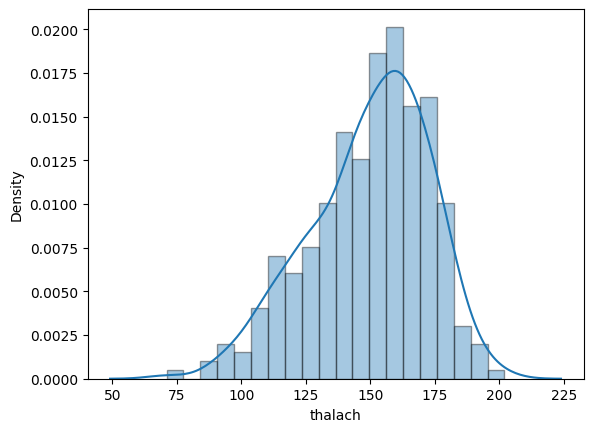

In [25]:
sns.distplot(df["thalach"], hist_kws = dict(linewidth = 1, edgecolor = "k"),bins=20);

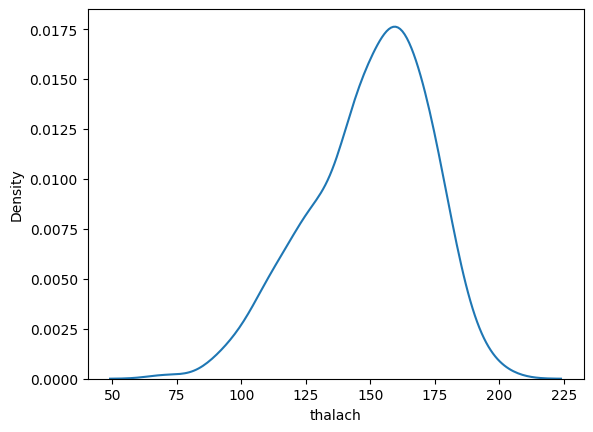

In [26]:
sns.distplot(df["thalach"], hist = False);


There is a left skewe this time.
The central average is 149.6
So there is a left skew, although not much.
When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
As a result, the data tends to be normally distributed, but there is a slight left skew.

* Mark the exact location in the chart
1. Creating the frame for the chart:-
      * Specifying two variables x and y. and call the matplotlib library and set the fig size parameter to eight come a six.(x,y=plt.subplots(figsize=(8,6)))
      * Set thee ax parameter to y and display and ax parameter returns the axes object with the plot for further fine tuning of the axes with matplot lib.
      * Create the y variable and apply the axvline function to that. Its going to determine the line that we want the x axis in the graph. and then apply the mean functiom to it. To make the line shape to dash

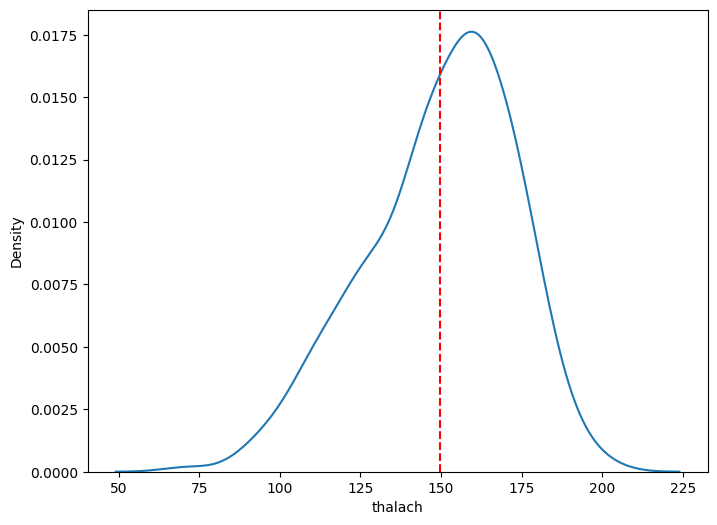

In [27]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--");

##The red line shows the avg of our data.Its tend to be in normal distribution.But there is indeed slight left skew

when we consider the oldpeak feature the minimum value is 0.0 and the maximum value is 6.2 so the avg need to be around 3.1. But in the dataset its 1.03.So when we consider the quartiles 75% of value consist of values upto 1.60. That shows there is incredible right skew in data. So in here the data is in quite the right skew.

###Check the same in oldpeak.

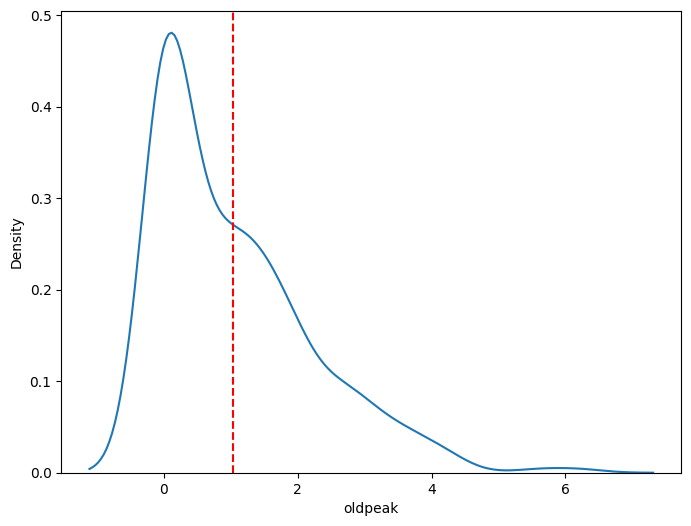

In [28]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist = False, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

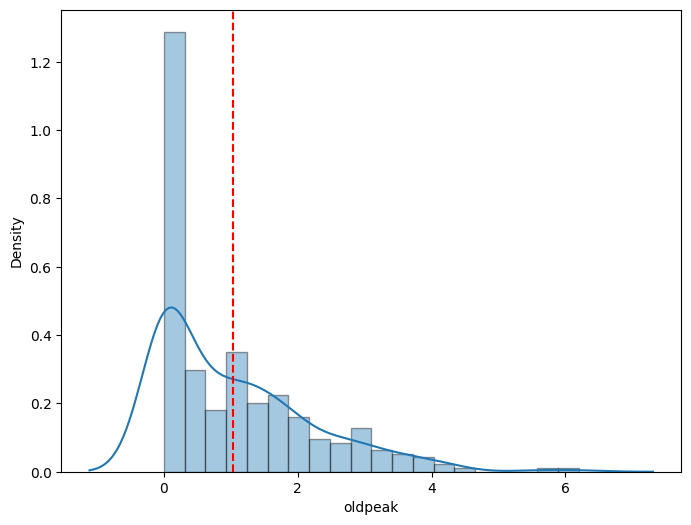

In [29]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

<h2>4. Exploratory Data Analysis <a id=15></a></h2>

we use Exploratory Data Analysis (EDA) to analyze research datasets.Inorder to summarize main features of these sets we usually use data visualization methods.

<h3>4.1 Uni-Variate Data Analysis <a id=16></a></h3>

Univariate data analysis is a statistical method that involves the analysis of a single variable or attribute at a time. In other words, it focuses on examining the distribution and characteristics of one variable without considering the relationship with other variables. This type of analysis is particularly useful for understanding the basic features of a dataset and gaining insights into the patterns and trends within that specific variable.

Common techniques used in univariate data analysis include:Descriptive Statistics,Frequency Distributions,Measures of Central Tendency,Measures of Dispersion,Box Plots,Probability Distributions etc.

<h3>4.1.1 Numerical Variable Analysis (with Displot) <a id=17></a></h3>

First we are going to operate on Numeric Variables. lets use the numeric_var to elict

In [30]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

To visualize all data at once we can use a for loop.we use seaborn library for the visualizations.we use plt.title to print the variable names in x and y axis.To make the lables read we can use dictionaries.

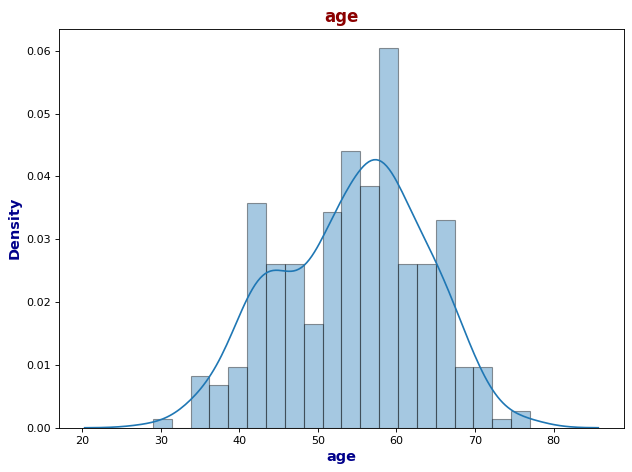

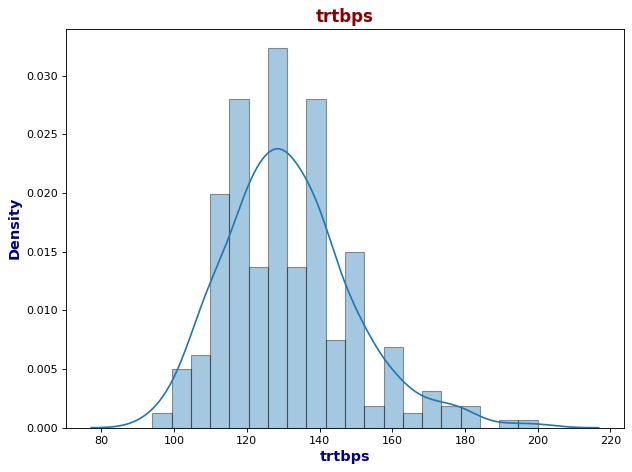

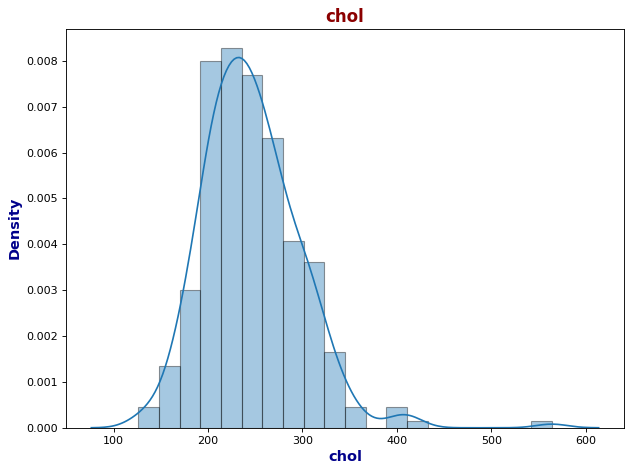

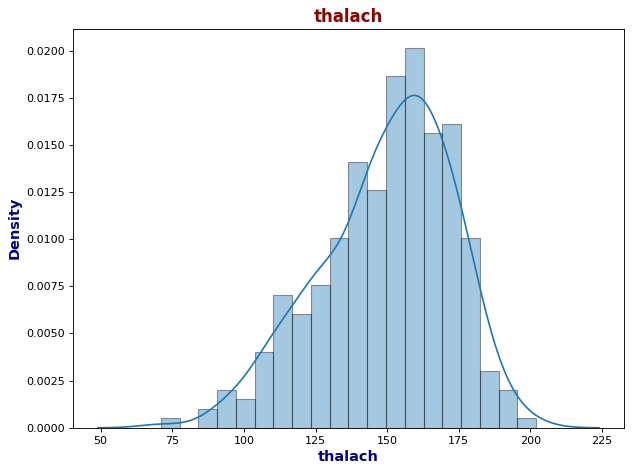

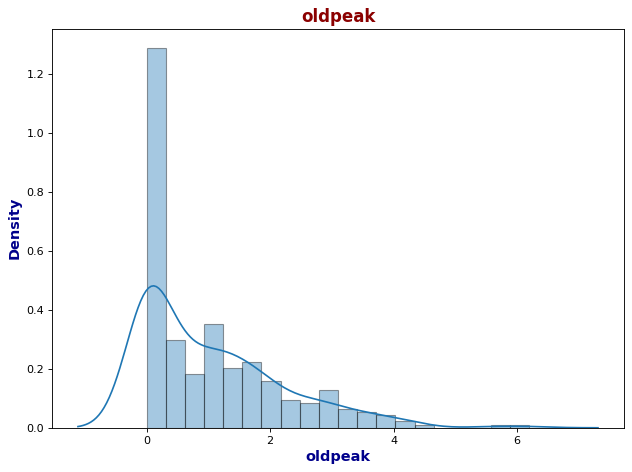

In [31]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in numeric_var:
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(i, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

<B><h2>Analysis</h2></B>

**Age variable**

There is a decrease between age of 47-50.In this scenario hence we are analysing on a single variable it could be difficult to understand.when we are doing binary variable analysis we can identify it.The vast majority of patients are between 50 and 60.

Therers are NO any outliers in age variable.

<b>trtbps variable (Resting blood pressure)</b>

The resting blood pressure of most of the patients generally between 110 and 140.In here the values after 180 can be considered as outliers.


*what is an outlier?*
As a data scientist the ultimate goal is to make healthy inferences from data.If the data is an outlier it would be difficult to make a healthy inference from the data. So its crucial to identify the outliers of a dataset.

Values after 180 can be considered as outliers.
There is hefty patient traffic between 115-120, 125-130, and 155-160 values.


**Cholesterol variable**

Cholesterol value in most patients is between 200-and 280.
Values after 380 can be considered as outliers.

**Thalach Variable**¶

The maximum heart rate achieved in most patients is between 145-and 170.
In particular, The values before 80 can be considered outliers.

**Oldpeak Variable¶**

Values of the vast majority of patients in the variable range from 0 to 1.5.
Especially values after 2.5 can be considered as outliers.

<h3>Categorical Variable analysis (with Pie chart)<a id=18></a></h3>

Calling the categoric var list.

In [32]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

Lets create a for loop and see a single output. There are various modes to visulaize the categorical variables Bar chrts are the most familier method.Lets use pie chart.The varaibles going to be visualize as the slizes of the pie.

In [33]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

Zipping the variable names and descriptions together.

In [34]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [35]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [36]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

Observation values

In [37]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

in operat will loop throgh the values in the variable.And then we can take the zip.The binary structures of the list will loope every time the loop starts.The first value goes into i and the second value goes into z.

Body of the for loop:
First need to determine the dimensions, values of the images.For that we need to create a framework as fig, ax. Set the figure size to 8,6 plt.subplots(figsize = (8, 6))

In pie chart it represents the precentage according to values and Start the visualization 

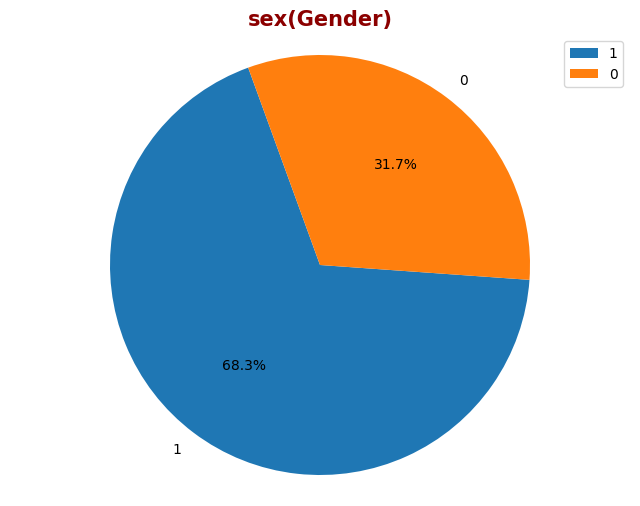

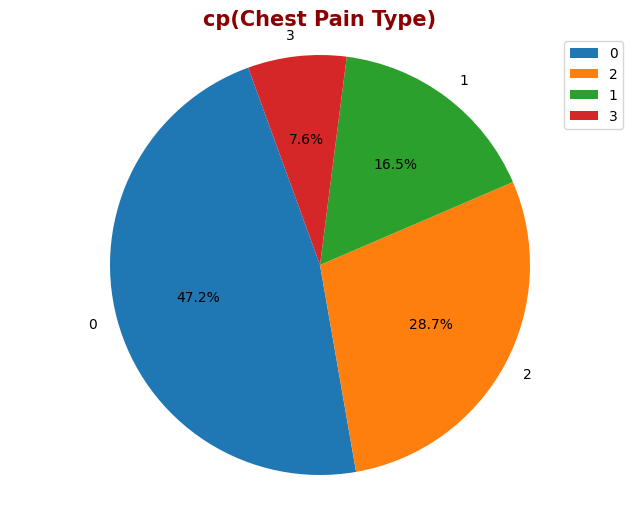

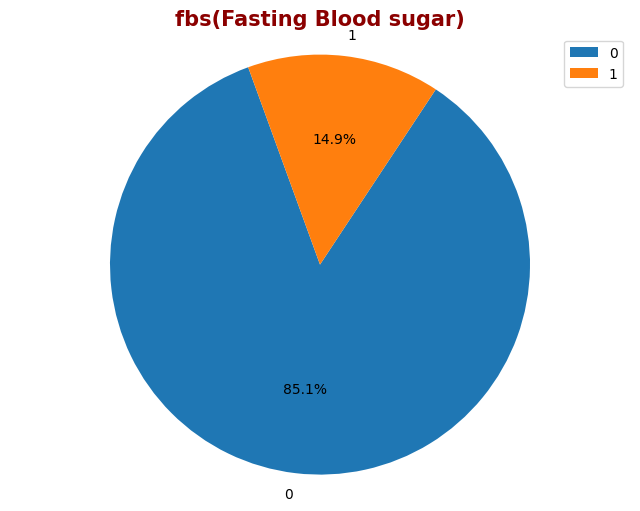

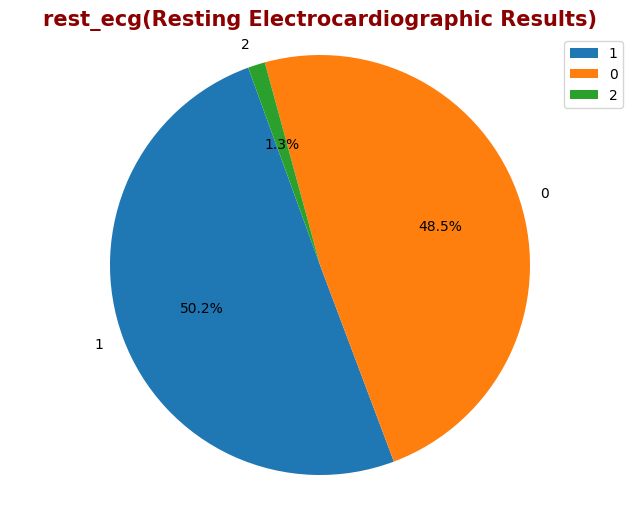

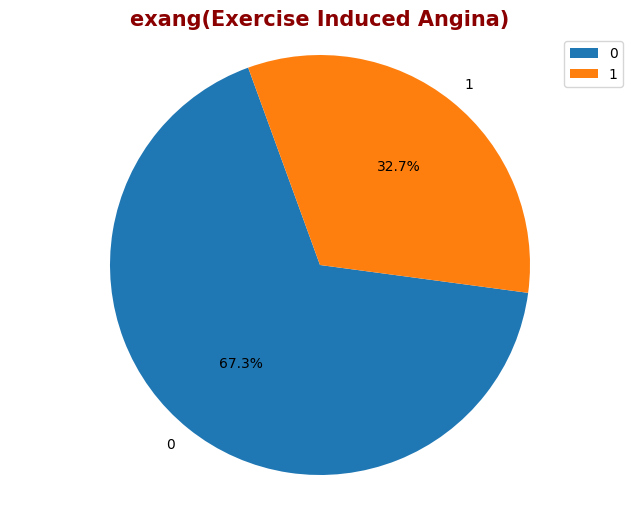

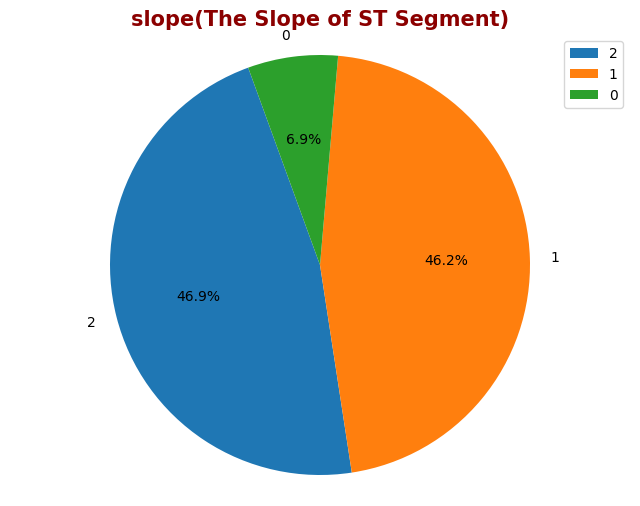

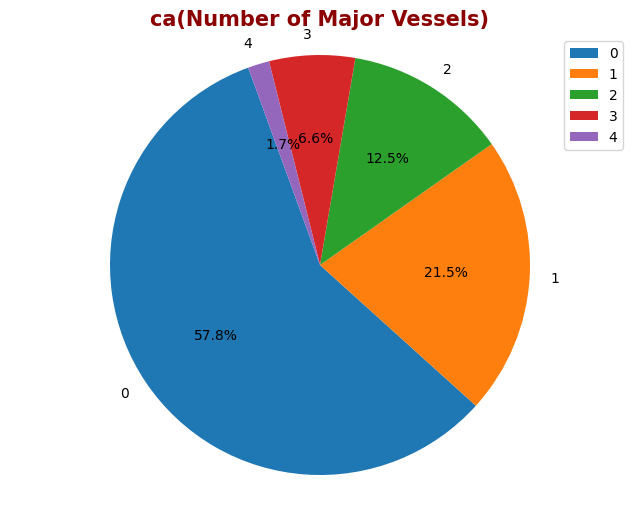

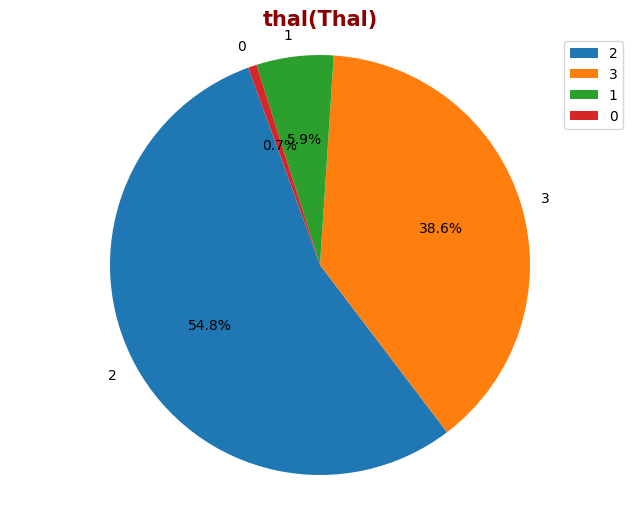

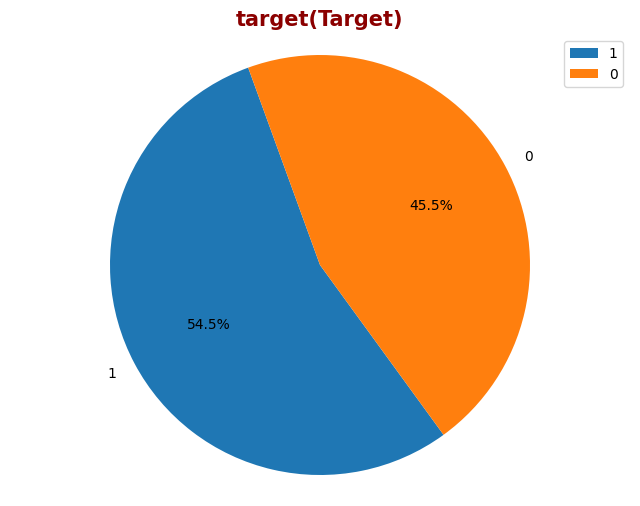

In [38]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

<h2>Analysis</h2>

**Sex**

68.3% of the patients are male and 31.7% are female.So number of male patients are 2x number of female patients.

**Chest pain type**

Most half of the patients have the observation value of Zero.(0=asymptomatic(Have pain without symptoms)). One out of four patients 29% have the observation value of two(2=Typical angina(Patients with shortnes breath or non classic pain)).

Other two variables have less precentages. 16.5% have the observation value of one.(1=(Patients who have typical angina,classic exertion,pain that comes during any physical activity)).

Other 8% has non anginia or pain which is three types of angina.(Noncardiac chest pain that is not cause by heart disease)

**FBC (Fasting blood sugar)**

85% of patients have zeroth observation value.(0=Fasting blood sugar,less than 120mg per dicilliater).

Other remaining 15% has the fasting blood sugar, more than 120mg per dicilliater.



**Rest ECG value**
1=Normal, 2=abnormal, 3=hypertrophy

The patients comes with the number of complaint of hypotherophy is generally low.According to the graph the patients with observation value is very low.It indicates that the patients with observation value is too hypotherophy.

So as a result we can consider 1 to be abnormal,2 to be hypotherophy and 0 to be normal.

The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.
It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.
This value represents the ST and T wavelengths of the patients.
Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
The size of those with 1, that is, the orange part on the graph is 50.2%
This means that the resting electrocardiographic results of these patients are normal.
The percentage of patients with a value of 0 is 48.5%.
That is, the patients' values of 48.5% are normal.

**Exang (Exercise Include Angina)**

We have said that this variable stands for exercise-induced angina.
Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

**ca variable**

This variable is the number of great vessels colored by fluoroscopy.
In more than half of the patients, 57.8 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
After 0 observation value, the other value with the most slices in the pie chart 1
The number of large vessels observed in 21.5% of the patients is 1
The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

**Thal variable**

The "Thal" variable is short for the "Thallium stress test."
The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.
According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
In this context, according to the thallium stress test results, 54.8 percent of the patients have two observation values, so the test result appears to be expected.
36.8 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.
5.9 percent of patients have a value of 1, so the test result for these patients is a fixed defect.


**Target variable**

More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.

<h3>4.1.2.2 Examing the missing values according to the analysis report<a id=19></a></h3>

Finding the values which are zero in the data set.

In [39]:
df[df["thal"]==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


we only have two rows where thal variable become zero. the row number 48 and 281.Lets create them more sensible data for that, first of all return the zero values to null in the dataset.

In [40]:
df["thal"]=df["thal"].replace(0,np.nan)

In [41]:
 df.loc[[48,281],:]   # we use : here because we need to select all columns

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


As you can see now the values have converted to null.

In [42]:
isnull_number=[]
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index=df.columns, columns=['Total missing values'])

,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


Now we have 2 null values in thal variable. Now we can fill them using sensible data.Lets graph the scope and find the maximum observation.There are several methods to fill the missing data. we are following the most repeated observation and value filling with next observation vlaue.

we used inplace parameter here because we want to make the changes permenantly.

In [43]:
df["thal"].fillna(2, inplace=True)

Lets call up the two lines again.

In [44]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


As you can see the values are filled with float type data.Lets see the other variables are also in the same data type.

In [45]:
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


All the values are filled with decimal, that could be a disadvantage for us because all the values in the thal variable has converted to the decimal type.So if we do a visualization work like this,we can get a logical image of that variable.in fact no image will come out as a printout.So we have to again convert the data type of this variable back to Integer.

In [46]:
df["thal"]=pd.to_numeric(df["thal"],downcast="integer")

In [47]:
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
isnull_number=[]
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index=df.columns, columns=['Total missing values'])

,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


Now there are no any missing values.

Lets have a look at unique variables using the valueu count variable.

In [49]:
df["thal"].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

<h2><a id=20>5. Bi-Variate Data Analysis</a></h2>

In bi-variate data analysis, we are going to examine the relationships of each variables with our target variable.

<h3><a id=21>5.1 Numerical Variable Analysis</a></h3>

we also called this technique as face grid. In this technique, we're going to take an x-ray of the variable grpah to visualise the variable.

In [50]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [51]:
numeric_var.append("target")

In [52]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [53]:
numeric_axis_name = ["age", "trtbps", "chol", "thalach",
                      "oldpeak"]

Inside the for loop a variable called graph has been initialised and then we called the seaborn library and inside there we firstly called the dataset.sns.FacetGrid(df[numeric_var])The hue parameter is to adjust the sizes of the graph.

To add a graph to the graph variable we use map function.

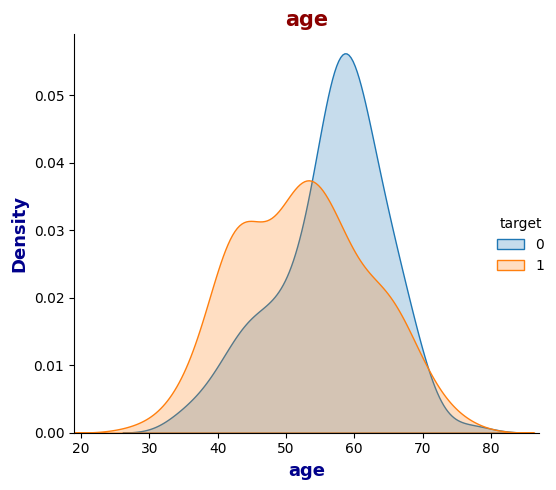

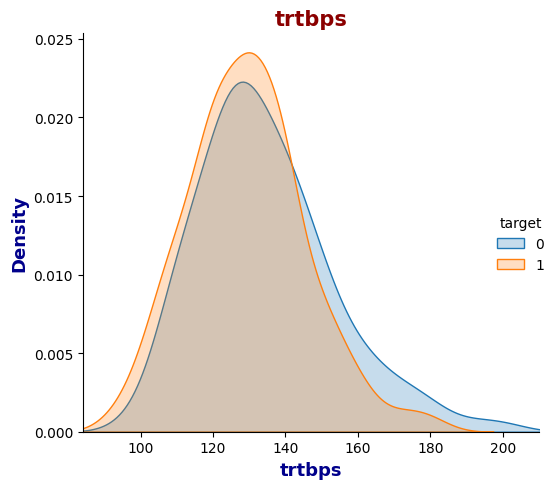

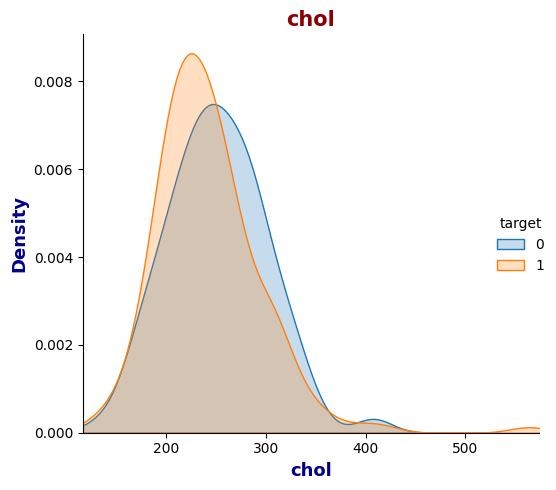

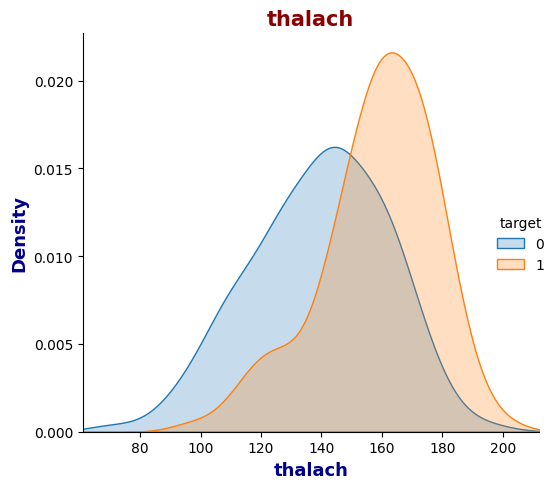

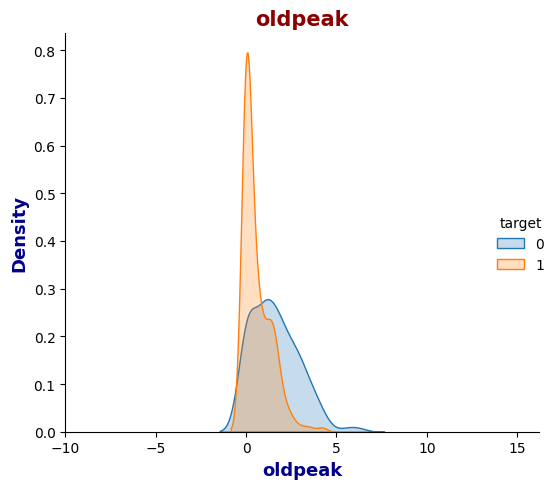

In [54]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

The orange ones are the pepole who has the risk of heartattack.

If the bumps are well seperated and Do not overlap, there is a correlation with the target and if the bumps overlap too much it means the feature does not correlate well with the target bcs its target is equally common at these values of the feature.

**Age variable**

we can say the risk of the heart attack has been increased with the age.But when analysing the graph it shows that number of people with heart attack is decreasing with the age progress.The graph shows that the risk of the heart attack getting decreased by age 55 (when analysing the blue graph)

**Resting blood pressure variable**
 
It's hard to say that whether the patient will have a heart attack with the resting blood pressure.The two graphs are almost identical in this case.

**cholesterol variable**

In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients.
If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.
The correlation between the two variables is -0.085239. In other words, we can say that it is negative, but very little.

**Thalac variable**

There is a situation that is evident in this graph.
The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.
It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
The correlation between the two variables is 0.421741. In other words, we can say that it is positive and moderate.

**Oldpeak**

When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.
We can say that the range of 0 to 1.5 is the critical threshold for us.
It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
The correlation between the two variables is -0.430696. In other words, we can say that it is negative and moderate.

In [55]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [56]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


<h2>Bi-Variate data analysis</h2>

Target variable analysis with count plot.

In [57]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

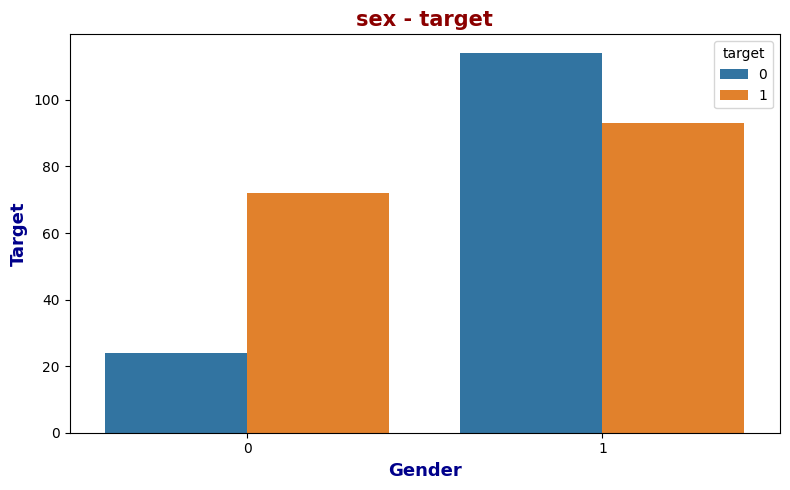

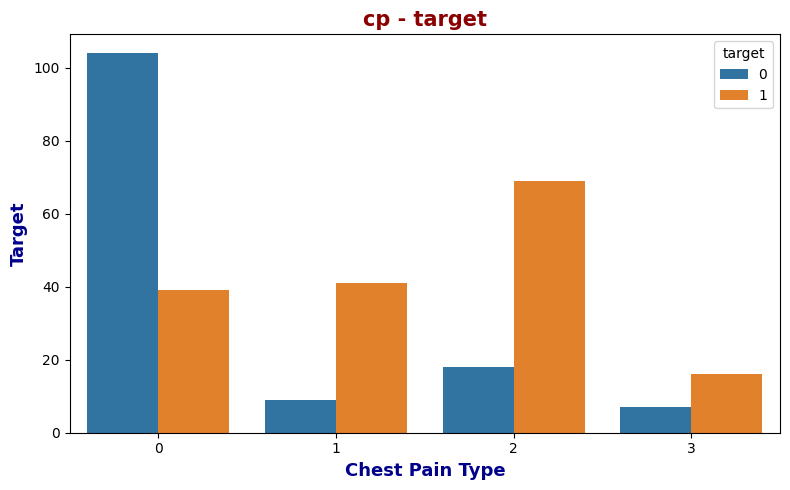

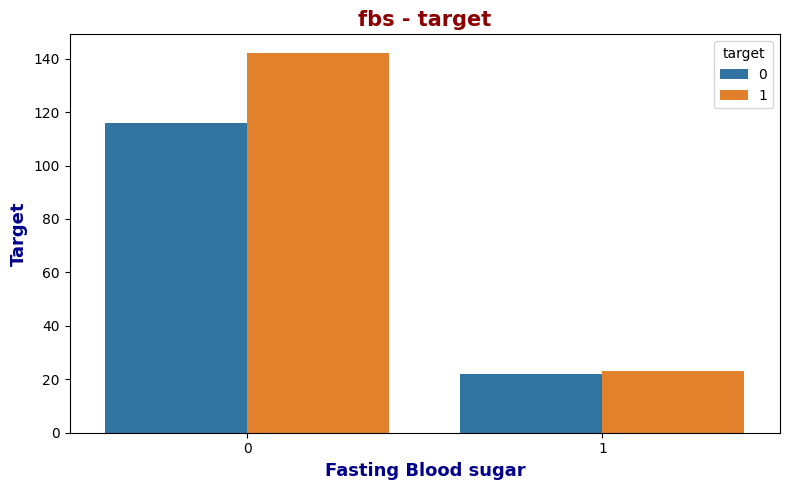

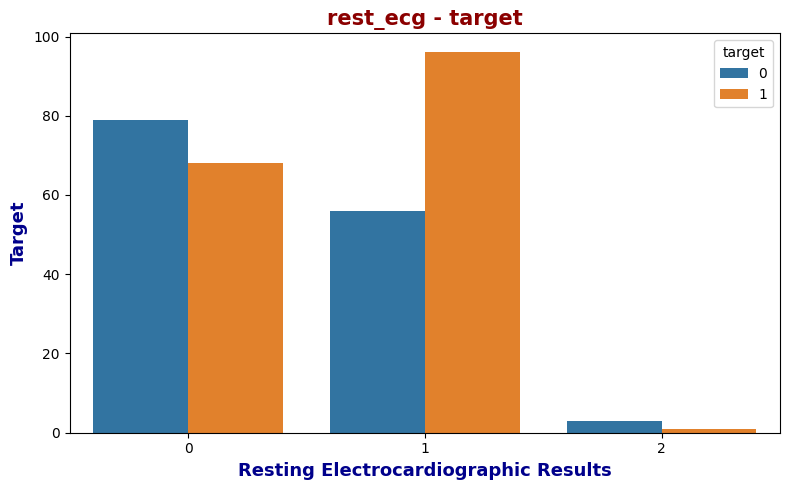

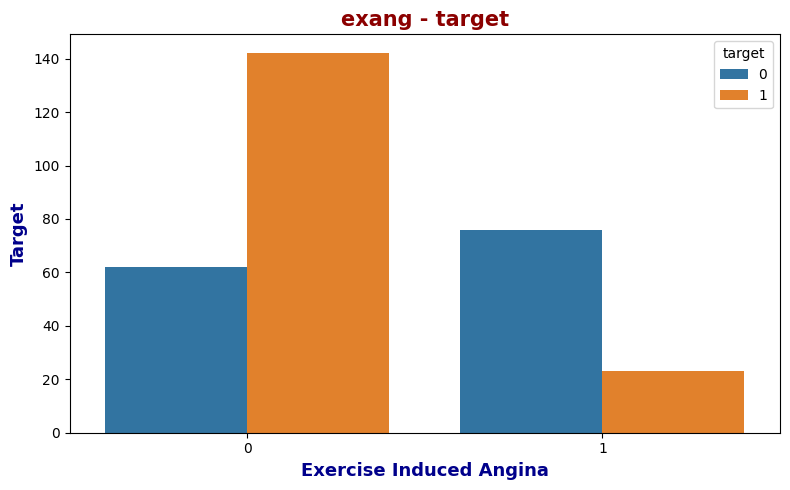

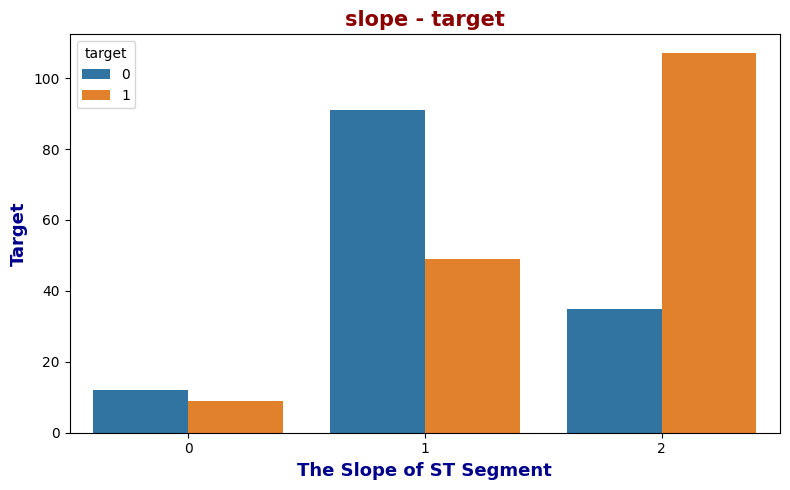

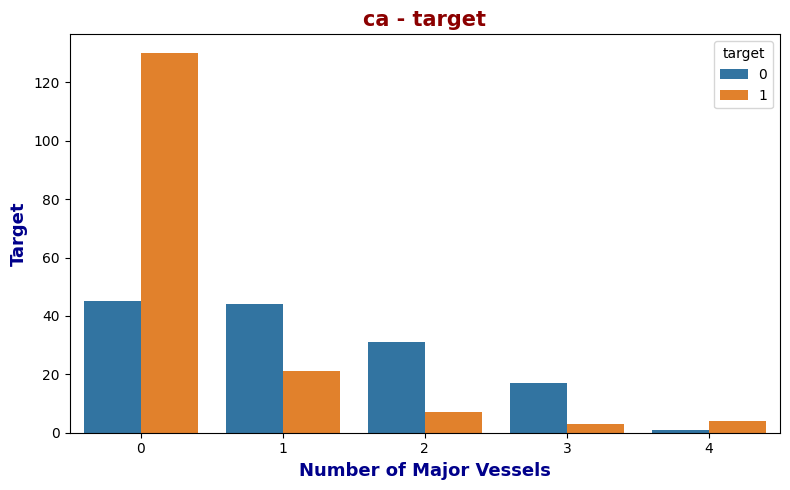

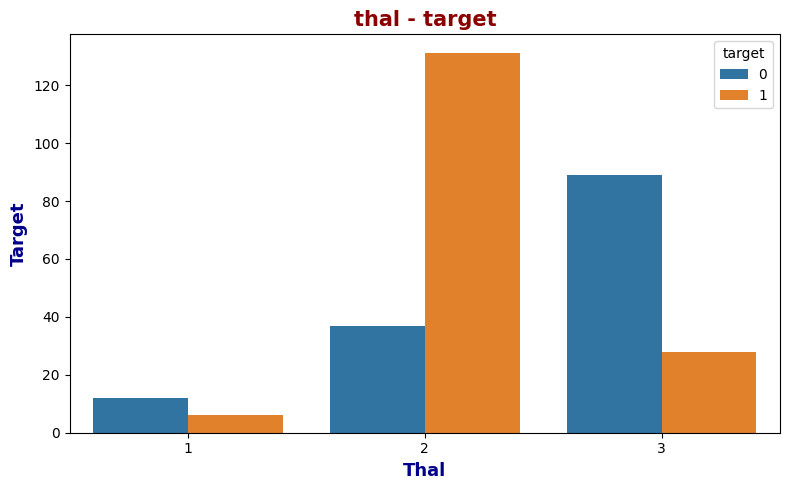

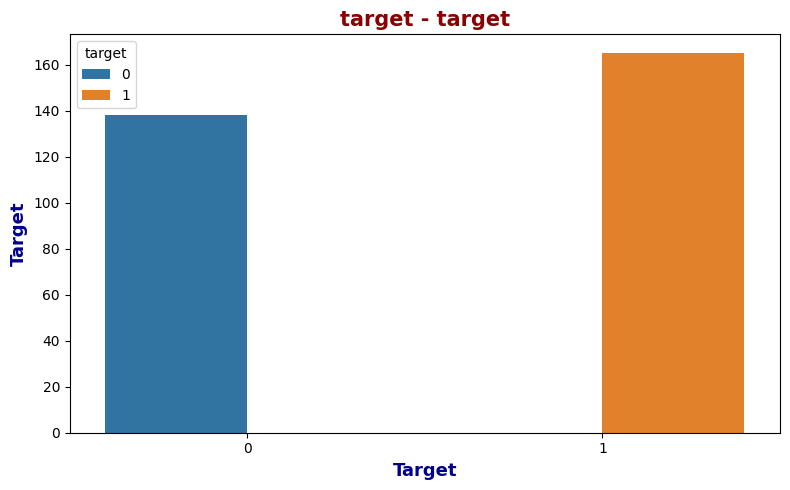

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

for i, z in zip(categoric_var, categoric_axis_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=i, data=df, hue="target")
    
    plt.title(i + " - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()


Orange ones are the patients who has the Risk of being a heart patient.

**Sex variable**

In x axis zero means the females and 1 menas the males.Patients at high risk of heart attack from women are almost more than half of those with low.
The situation is different for those with an observation value of 1, that is, for men. The blue-colored bar has more observation values.
So men are more likely than not to have a heart attack.
In summary, female patients are at higher risk for heart attack
The correlation between the two variables is -0.280937. In other words, we can say that there is a negative low-intensity correlation.

**cp variable**

First bar graph has an observation value of 0, asymptomatic pains. This pain was pain that occurred without symptoms.
Patients with this pain are less likely to have a heart attack. When we look at the probability of not having a heart attack, we can say that it is almost three times the other.
In the other three types of pain, having a heart attack is almost three times higher than the risk of not having it.
In summary, If a patient's "cp" variable is 1, 2, or 3, we can say that the risk of heart attack is high.
The correlation between the two variables is 0.433798. In other words, we can say that there is a positive, moderately strong correlation.

**Fbs variable**

The risk of heart attack is slightly higher in those with a 0 observation value as fasting blood sugar.
Patients with fasting blood sugar lower than 120 mg/dl can be positioned as risky.
If we look at the value of 1 observation value, the situation seems to be somewhat equal here.
In other words, it is a little challenging to say anything definite about heart attack in patients with fasting blood sugar greater than 120 mg/dl.
The correlation between the two variables is -0.028046. In other words, we can say that there is a very low-intensity correlation in the negative direction.

**Rest-ECG**

Attention should be paid to patients with a "rest ecg" value of 1. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack.
The other two observation values are also more likely not to have a heart attack.
The correlation between the two variables is 0.137230. In other words, we can say that there is a positive low-intensity correlation.

**Exang**

Pain due to exercise does not affect the heart attack.
If the patient's "exang" variable is 1, that is, if he has exercise-related angina, the probability of not having a heart attack is higher.
In contrast, patients who do not have exercise-related angina are more likely to have a heart attack.
This means that exercise-related pain has nothing to do with a heart attack.
The correlation between the two variables is -0.436757. In other words, we can say that there is a negative, moderately strong correlation.

**Slope**

It is necessary to pay attention to the patients with a "slope" variable of 2.
Because patients with an observation value of 2 are three times more likely to have a heart attack than not having a heart attack.
If we examine other values, the risk of heart attack is lower in patients with an observation values of 0 and 1.
Especially if the observation value is 1, if it has a flat slope, we can say that it is two times more likely not to have a heart attack.
The correlation between the two variables is 0.345877. In other words, we can say that there is a positive, moderately strong correlation.

**ca variable**

The group at risk for this variable is patients with an observation value of 0.
If you notice, the risk of heart attack is almost three times higher in patients with an observation value of 0.
For 1, 2, and 3 observation values, this shows the opposite situation. In other words, patients with "ca" observation values of 1, 2, and 3 are almost twice as likely to have a heart attack as those not having them.
There is something remarkable here. Although the number of patients with a "CA" value of 4 is less than the general population, the risk of having a heart attack seems to be higher.
The correlation between the two variables is -0.363322. In other words, we can say that there is a negative, moderately strong correlation.

**Thal variable**

Patients with an observation value of 2 are three times more likely to have a heart attack than if they have not.
The opposite is true for other values. The situation of not having a heart attack appears to be higher.
The correlation between the two variables is -0.363322. In other words, we can say that there is a negative, moderately strong correlation.

In [59]:
df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [60]:
df[categoric_var].corr().iloc[:, [-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


<h2>5.2 Examing the numeric variables among themselves (Analysis with pair-plot)<a id=22></a></h2>

In [61]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [62]:
numeric_var.remove("target")

In [63]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


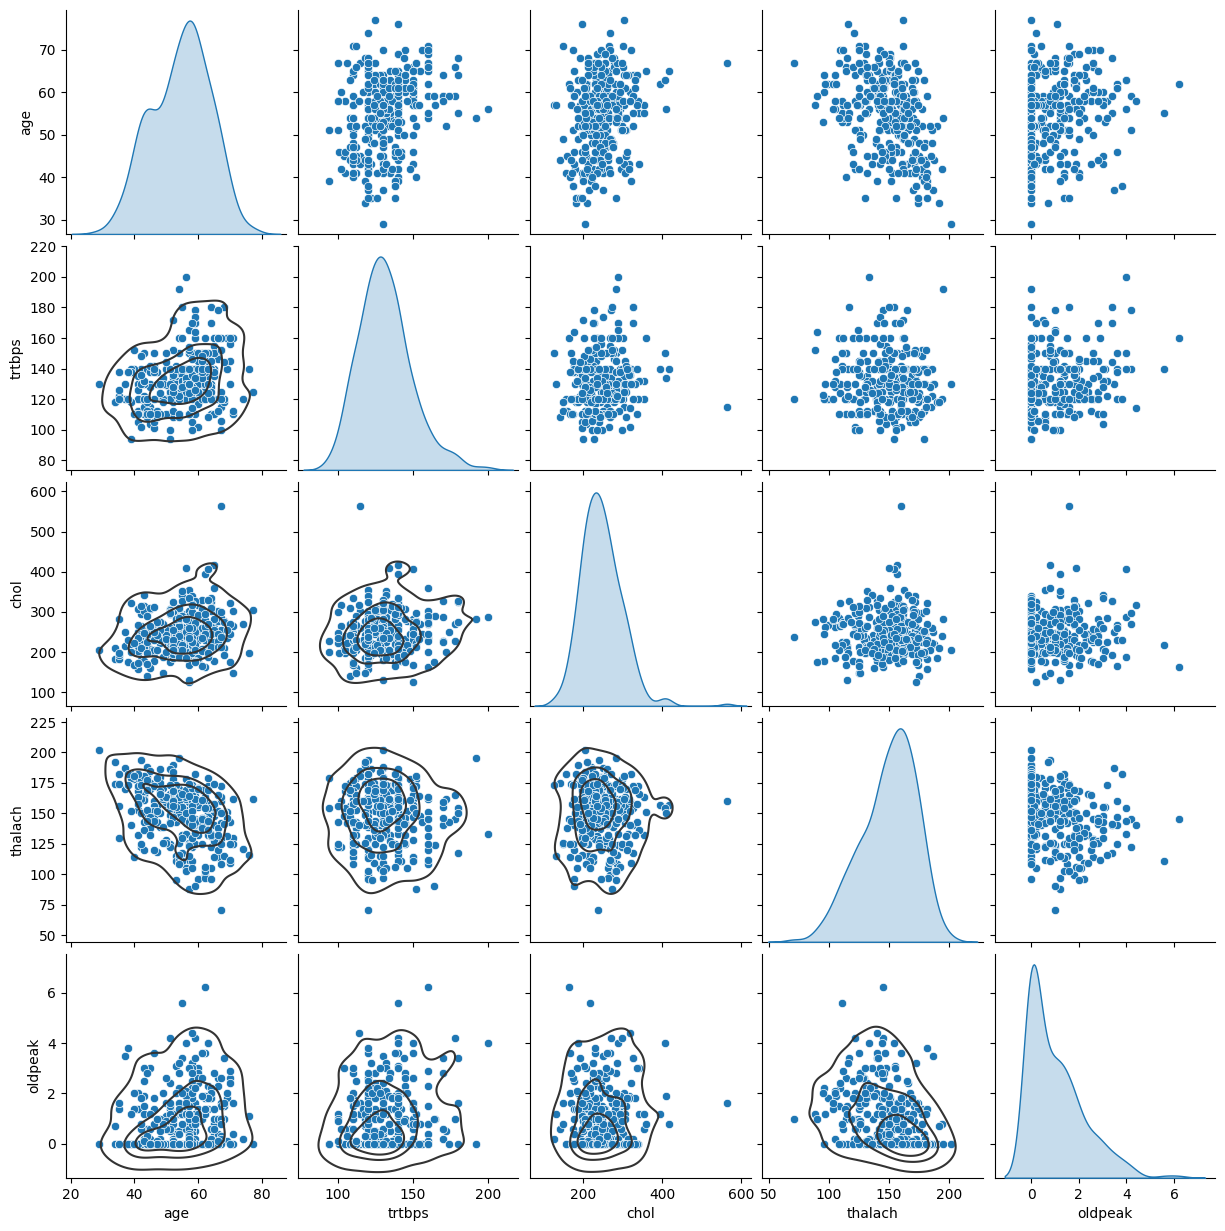

In [64]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

The pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

The scatter plot; is a drawing or mathematical diagram that typically uses Cartesian coordinates to display the values of two variables in a dataset. If the points are close to each other and have a regular appearance in terms of their directions, we can say a strong connection between the two variables. There is a directly proportional relationship between two variables in positive directional relationships. An increase in one variable causes an increase in the other variable. In negative relationships, there is an inversely proportional relationship between the variables. When the value of one variable decreases, the other variable also decreases.

<h3>5.3 Feature scalling with robust method<a id=23></a></h3>

In [65]:
from sklearn.preprocessing import RobustScaler

In [66]:
robust_scaler = RobustScaler()

In [67]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [68]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [69]:
type(scaled_data)

numpy.ndarray

In [70]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


<h3>5.4 Creating a new data-frame with melt() function<a id=24></a></h3>

In [71]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)

In [72]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [73]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables", value_name = "value")

In [74]:
melted_data

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


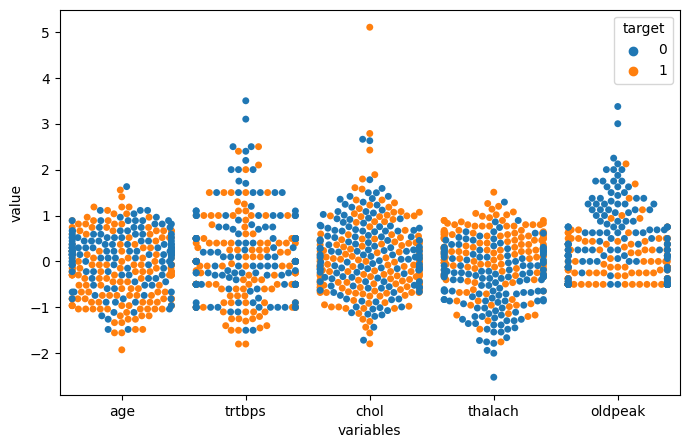

In [75]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value", hue = "target", data = melted_data)
plt.show()